# **Intermovie**
## *Groupe 3 - Farida & Orkaëlle*
La société Intermovie développe une offre concurrente à Netflix/Amazon Vidéo.   
Elle voudrait pouvoir permettre à ses utilisateurs de recevoir des recommandations de nouveaux films à regarder, ainsi que d'obtenir diverses informations sur les films qui font actuellement partis de son catalogue.

### Initialisation du projet :

In [1]:
import datetime
start = datetime.datetime.now()

In [2]:
# Auto-reload
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import fct_intermovie as fct

In [4]:
# Création des dossiers nécessaires à l'execution du programme
fct.check_folder()

# Datas loading
fct.ensure_data_loaded()

# Split Datas
fct.split_data('title.basics.tsv', 'BASICS', 'titleType')
fct.split_data('title.principals.tsv', 'PRINCIPALS', 'category')
fct.split_data('title.akas.tsv', 'AKAS', 'region')


Downloading...
Dataset dowloaded successfully.
Extracting...
Dataset extracted successfully.
Datas are successfully loaded.

Spliting BASICS...
Done.
Spliting PRINCIPALS...
Done.
Spliting AKAS...
Done.


In [5]:
# Création des datasets originaux
actors, principals, basics, akas, ratings = fct.create_df()


Converting tsv files...
Datasets imported successfully from tsv to pandas dataframes.



### Requêtes :

In [6]:
# Requête 1 : liste des acteurs par film
df_rq1 = fct.req1(principals, basics, actors)

Rq 1 - Work in progress...
CSV file &quot;01_actor_by_film&quot; saved in the results folder.



In [7]:
# Requête 2 : liste des films Américains (en gardant leur nom en français) et leur note moyenne
df_rq2 = fct.req2(akas, basics, ratings)

Rq 2 - Work in progress...
CSV file &quot;02_usfilm_ratings&quot; saved in the results folder.



In [8]:
# Requête 3 : notes moyennes des différents genres
df_rq3 = fct.req3(basics, ratings)

Rq 3 - Work in progress...
CSV file &quot;03_ratings_by_genre&quot; saved in the results folder.



In [9]:
# Requête 4 : note moyenne de chaque acteur par rapport aux films dans lesquels il apparaît
df_rq4 = fct.req4(principals, actors, ratings)

Rq 4 - Work in progress...
CSV file &quot;04_ratings_by_actor&quot; saved in the results folder.



### Bonus 3 - Prédiction des notes des films

Bonus 3 - Work in progress...

Train : (328425, 12)
Test : (82106, 12)

Predictions: [3.         5.3984375  5.3984375  ... 7.69921875 7.69921875 8.1015625 ]
Computed error: 4.367747938385234e-29


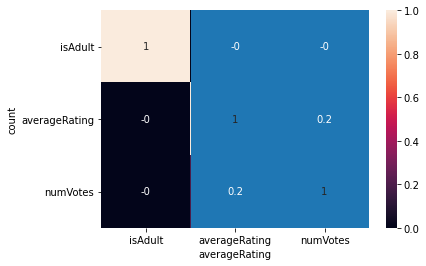

In [10]:
fct.prediction(basics, ratings, akas, actors, principals)

In [11]:
end = datetime.datetime.now()
print (f"Temps d'execution : {end - start}")

Temps d&#39;execution : 0:15:33.974265
